<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2020/week_43/Great_American_Beer_Festival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import seaborn as sns
import numpy as np
import random

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-20/beer_awards.csv')

df.head()

,medal,beer_name,brewery,city,state,category,year
0,Gold,Volksbier Vienna,Wibby Brewing,Longmont,CO,American Amber Lager,2020
1,Silver,Oktoberfest,Founders Brewing Co.,Grand Rapids,MI,American Amber Lager,2020
2,Bronze,Amber Lager,Skipping Rock Beer Co.,Staunton,VA,American Amber Lager,2020
3,Gold,Lager at World's End,Epidemic Ales,Concord,CA,American Lager,2020
4,Silver,Seismic Tremor,Seismic Brewing Co.,Santa Rosa,CA,American Lager,2020


# Prepare Data For Plotting

**Generate 20 random x coordinates between 6 and 19 for the bubbles.**

In [3]:
# List to collect x positions
random_position = []

# For me
random.seed(a = 12, version=2)

# Generate 20 random numbers between 6 and 19 inclusive
for i in range(0,20):

  # Random number
  n = random.randint(6,19)

  # Sappend to list
  random_position.append(n)

# Print output so others can reproduce
repro = random_position
repro

[13, 10, 16, 14, 16, 11, 8, 12, 6, 11, 13, 10, 16, 18, 13, 17, 19, 15, 9, 14]

**Find the number of medals (regardless of type) earned by each state over the entire time period.**

In [5]:
# Number of medals by state. Select the top 20 states by number of medals.
df_count = df.groupby('state').count().sort_values(by = 'medal', ascending = False).reset_index().head(20)[['state', 'medal']]

# Add the x positions generated in the above cell as a column
df_count['x_pos'] = random_position

# We will be plotting using this data
df_count.head()

,state,medal,x_pos
0,CA,962,13
1,CO,659,10
2,OR,328,16
3,TX,249,14
4,WI,234,16


# Create Figure

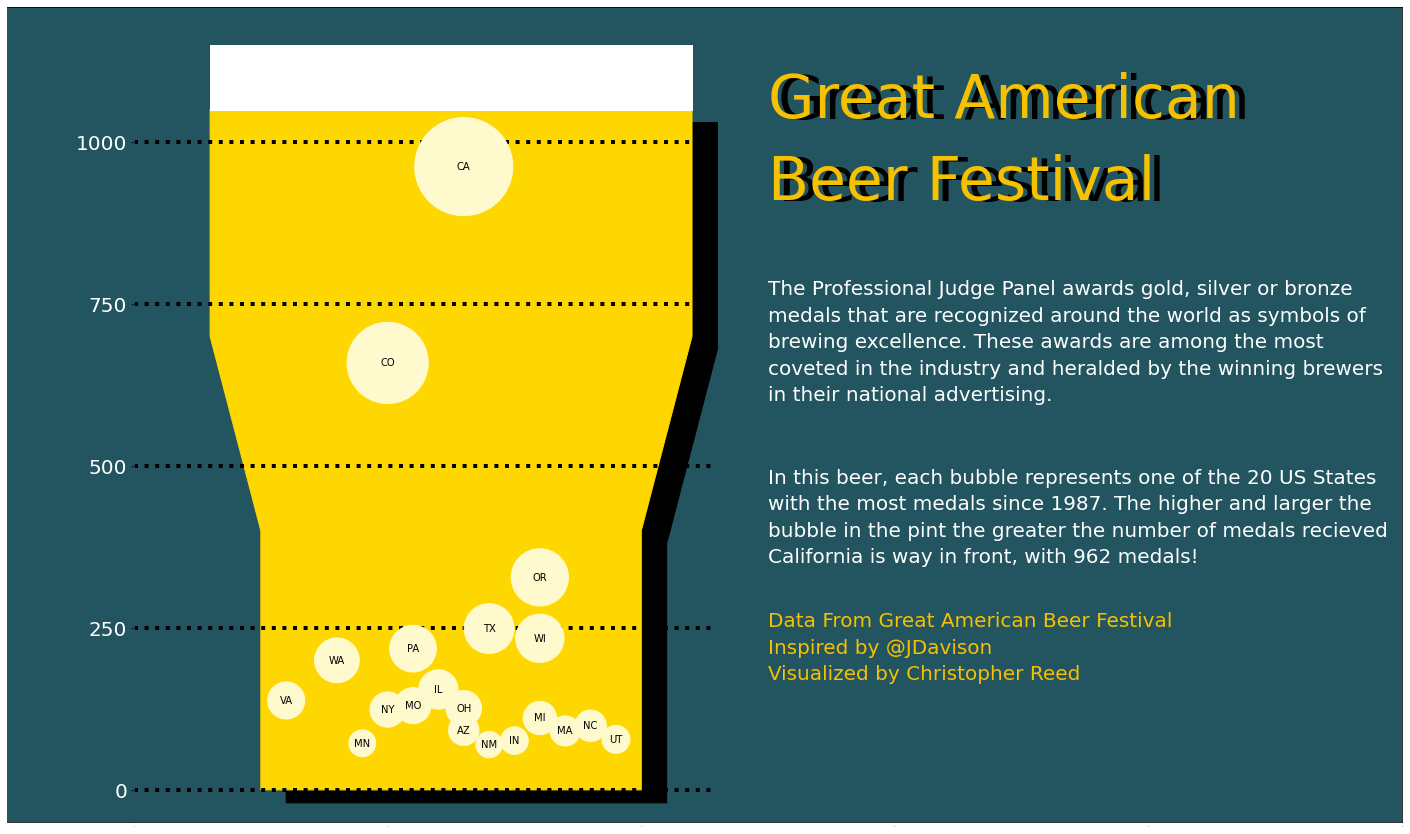

In [9]:
#################
##CREATE FIGURE##
#################

fig, ax = plt.subplots(figsize = (25, 15))

################
##SCATTER PLOT##
################

# Scale size of points by the number of medals earned by each state
ax.scatter(x = df_count['x_pos'], y = df_count['medal'], s = 10 * df_count['medal'], zorder = 5, color = 'lemonchiffon')


################
##STATE LABELS##
################

# Points for state labels
for i in np.arange(df_count.shape[0]):
  ax.text(df_count['x_pos'][i], df_count['medal'][i], df_count['state'][i], ha = 'center', va = 'center', zorder = 10)


#####################
##PINT GLASS FIGURE##
#####################

# Define coords (x,y) of polygon and then fill
xcoords_beer = [5, 20, 20, 22, 22, 3, 3 ,5]
ycoords_beer = [0, 0, 400, 700, 1050, 1050, 700, 400]
ax.fill(xcoords_beer, ycoords_beer, color = 'gold', zorder = 1)

xcoords_foam = [22, 22, 3, 3]
ycoords_foam = [1050, 1150, 1150, 1050]
ax.fill(xcoords_foam, ycoords_foam, color = 'white', zorder = 1)

#####################
##PINT GLASS SHADOW##
#####################

xcoords_beer_shadow = [x + 1 for x in xcoords_beer]
ycoords_beer_shadow = [x - 20 for x in ycoords_beer]

ax.fill(xcoords_beer_shadow, ycoords_beer_shadow, color = 'black', zorder = 0)


###################
##TEXT COMPONENTS##
###################

# Title with offset for shade effect
ax.text(25, 1000 ,
        'Great American\nBeer Festival',
        fontsize = 60,
        ha = 'left',
        va = 'center',
        linespacing = 1.5,
        color = '#F6C101',
        zorder = 2)

# Title shadow. Zorder must be lower than title.
ax.text(25+0.4, 1000 - 2,
        'Great American\nBeer Festival',
        fontsize = 60,
        ha = 'left',
        va = 'center',
        linespacing = 1.5,
        color = 'black',
        zorder = 1)

# Text blurb
caption_1 = '''The Professional Judge Panel awards gold, silver or bronze
medals that are recognized around the world as symbols of
brewing excellence. These awards are among the most
coveted in the industry and heralded by the winning brewers
in their national advertising. '''

ax.text(25, 600,
        caption_1,
        fontsize = 20,
        linespacing = 1.5,
        color = 'white')

caption_2 = '''In this beer, each bubble represents one of the 20 US States 
with the most medals since 1987. The higher and larger the
bubble in the pint the greater the number of medals recieved
California is way in front, with 962 medals!'''

ax.text(25, 350,
        caption_2,
        fontsize = 20,
        linespacing = 1.5,
        color = 'white')

# Credits
caption_3 = "Data From Great American Beer Festival\nInspired by @JDavison\nVisualized by Christopher Reed"
ax.text(25, 170,
        caption_3,
        fontsize = 20,
        linespacing = 1.5,
        color = '#F6C101')

###################
##AXIS FORMATTING##
###################

# Limits for x and y axis
ax.set_xlim(-5, 50)
ax.set_ylim(bottom = -50)

# Move the y axis to zero. Set color the same as background.
ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('#225560')

# Increase the y axis label size and change their color to white
ax.tick_params(axis = 'y', labelsize = 20, labelcolor = 'white')

# Hide x axis labels and ticks
ax.tick_params(axis = 'x', labelsize = 0, length = 0)

# Set y-ticks
ax.set_yticks(np.arange(0,1250, 250))

# Dashes for y axis
for i in np.arange(0, 1250, 250):
  ax.plot([0, 23], [i, i], ls = ':', lw = 4, color = 'black')

# Background color of entire plot
ax.set_facecolor('#225560')

plt.savefig('/content/drive/My Drive/TidyTuesday/tidytuesday_beer.jpg', bbox_inches = 'tight')